Nuevamente, basado en el gran trabajo de Manuel Ferreira de @mattewithcoffee 

http://twitter.com/mattewithcoffee

https://www.youtube.com/watch?v=lz-Csu3ce4s&feature=youtu.be

In [108]:
# Carga de librerías
import pandas as pd
import pandas_datareader as pdr

In [109]:
# Descarga de Cotización y limpieza
df = pdr.get_data_yahoo('MIRG.BA','06-24-2019')
df = df[df['Volume']>0]
df = df.drop('Adj Close', axis=1)

In [110]:
# Hasta ahí no hay nada nuevo
# Manuel Ferreira: MEDIA MOVIL SIMPLE
df['SMA_7'] = df.iloc[:,3].rolling(window=7).mean()

# Media Móvil Exponencial
df['EMA_7'] = df.iloc[:,3].ewm(span=7, adjust=False).mean()

# Media Móvil Acumulada
df['CMA_7'] = df.iloc[:,3].expanding(min_periods=7).mean()

# Doble Media Móvil Exponencial
df['2_EMA_7'] = df.EMA_7.ewm(span=7, adjust=False).mean()
df['2_x_EMA_7'] = 2*(df['2_EMA_7'])
df['DEMA_7'] = df['2_x_EMA_7'] - df['2_EMA_7']

# Triple Media Móvil Exponencial
df['3_EMA_7'] = df['2_EMA_7'].ewm(span=7, adjust=False).mean() # Media Movil Exponencial de la EMA de la EMA n=12
df['TEMA_7'] = (3*df['EMA_7'])-(3*df['2_EMA_7'])+df['3_EMA_7']

# TRIMA Media Móvil Triangular
df['TRIMA_7'] = df.SMA_7.rolling(window=7).mean()

# MACD
df['12d_EMA'] = df.iloc[:,3].ewm(span=12, adjust=False).mean()
df['26d_EMA'] = df.iloc[:,3].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12d_EMA']- df['26d_EMA'] 

# Calcula MACD
df['MACD_signal'] = df.MACD.ewm(span=9, adjust=False).mean() 

# Calcula Fuerza de la Tendencia
df['Strength'] = (df['MACD']-df['MACD_signal'])



In [111]:
# Visualización en tabla de todos
df[['Close','MACD','MACD_signal','TRIMA_7','TEMA_7','DEMA_7','CMA_7','EMA_7','SMA_7','Strength']]

,Close,MACD,MACD_signal,TRIMA_7,TEMA_7,DEMA_7,CMA_7,EMA_7,SMA_7,Strength
Date,,,,,,,,,,
2019-06-24,339.0,0.000000,0.000000,NaN,339.000000,339.000000,NaN,339.000000,NaN,0.000000
2019-06-25,338.0,-0.079772,-0.015954,NaN,338.421875,338.937500,NaN,338.750000,NaN,-0.063818
2019-06-26,337.5,-0.181249,-0.049013,NaN,337.816406,338.812500,NaN,338.437500,NaN,-0.132235
2019-06-27,344.5,0.299717,0.020733,NaN,341.546875,339.097656,NaN,339.953125,NaN,0.278984
2019-06-28,343.0,0.553468,0.127280,NaN,342.749512,339.501953,NaN,340.714844,NaN,0.426189
...,...,...,...,...,...,...,...,...,...,...
2020-06-18,769.5,36.671047,45.348507,822.846939,789.078422,809.610941,537.983333,806.468036,813.857143,-8.677459
2020-06-19,819.0,35.289220,43.336649,823.448980,801.260162,809.608462,539.149378,809.601027,814.285714,-8.047429
2020-06-22,831.5,34.801587,41.629637,822.163265,816.007116,810.975289,540.357438,815.075770,812.357143,-6.828050


In [112]:
import numpy as np

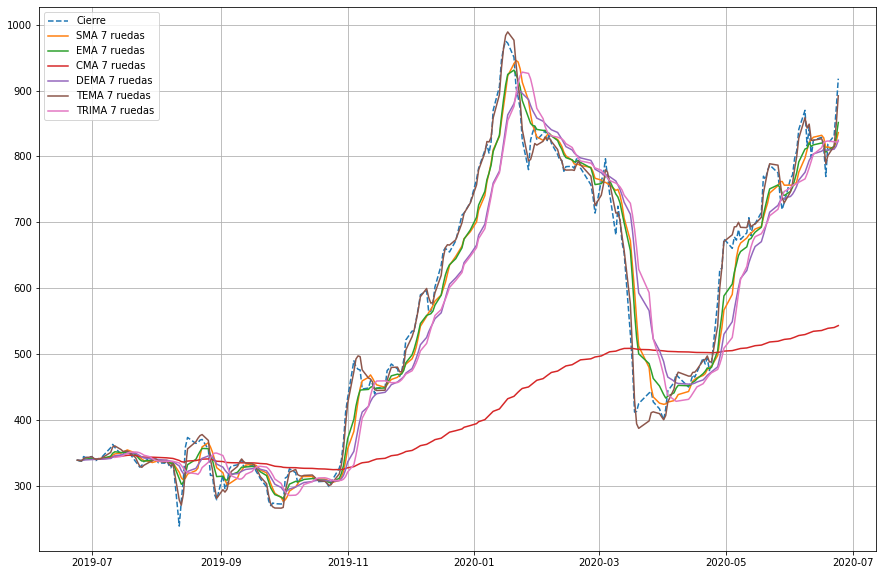

In [113]:
# Visualización gráfica de todos
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Close'],label='Cierre',
         linestyle='dashed')
plt.plot(df['SMA_7'],label='SMA 7 ruedas')
plt.plot(df['EMA_7'],label='EMA 7 ruedas')
plt.plot(df['CMA_7'],label='CMA 7 ruedas')
plt.plot(df['DEMA_7'],label='DEMA 7 ruedas')
plt.plot(df['TEMA_7'],label='TEMA 7 ruedas')
plt.plot(df['TRIMA_7'],label='TRIMA 7 ruedas')
plt.legend()

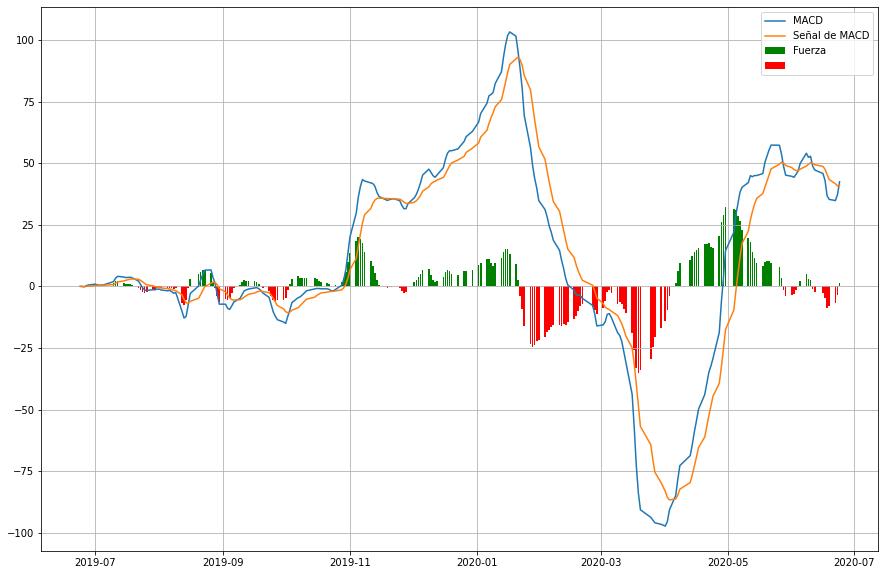

In [114]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['MACD'],label='MACD')
plt.plot(df['MACD_signal'],label='Señal de MACD')
plt.bar(df.index,df['Strength'].gt(0)*df['Strength'],label='Fuerza',color='g')
plt.bar(df.index,df['Strength'].lt(0)*df['Strength'],label=' ',color='r')
plt.legend()